<a href="https://colab.research.google.com/github/alleflucas/Analise-e-classificacao-das-condicoes-de-balneabilidade-das-praias-do-Rio-Grande-do-Norte/blob/master/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Desenvolvimento de um modelo de *Machine Learning* para previsão de cancelamento de clientes no contexto bancário.


**Contextualização do Problema**</br>
<P>Identificar quais clientes têm maior probabilidade de cancelar sua assinatura, deixar de usar seus serviços ou deixar de comprar seus produtos pode ser fundamental para as empresas desenvolverem estratégias de retenção de clientes. Com essa informação, as empresas podem oferecer ofertas personalizadas, promoções especiais ou melhorias no serviço ao cliente evitando sua saída.</P>
<P>Uma das ferramentas mais eficazes para prevenir a saída de clientes é a utilização de modelos de Machine Learning, realizando uma análise preditiva dos dados com o intuído de criar um modelo capaz de identificar através do perfil do cliente se este sairá ou não da empresa.</P>
<P>Neste caso, utilizaremos dados de um banco fictício chamado "BancoFácil" que atua na região sul do Brasil. 
**Realizaremos a análise exploratória, limpeza , preparação dos dados e  um modelo de Machine Learning.**</P>


## Importar os Dados

Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](https://drive.google.com/file/d/1QrSr--3Jjdt90DAuy6hbDStGlKD6zC3u/view?usp=share_link).


In [ ]:
#Importando bibliotecas
import pandas as pd #Manipular DataFrame
import seaborn as srn #Gerar Gráficos
import statistics  as sts #Formulas matemáticas
from sklearn.model_selection import train_test_split # dividir entre os dados de treino e os dados de teste
from sklearn.preprocessing import LabelEncoder # transformar atributos categóricos em em numérico 
from sklearn.metrics import confusion_matrix, accuracy_score # gerar matriz de confusão
# Seleção de atributos - obter a métrica de performance dos atributos, diminuir o número de variáveis
from sklearn.svm import SVC # usar a máquina de vetor de suporte (support vector machines)
from sklearn.ensemble import ExtraTreesClassifier
# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [ ]:
#importar dados
dataset = pd.read_csv("https://raw.githubusercontent.com/alleflucas/ciencia-de-dados/main/Churn.csv", sep=";")

## Análise Exploratória de Dados

E importante realizar a análise exploratória para identificar  os tipos de dados e possíveis problemas de duplicidades, consistencia, completude, conformidade e integridade.


In [ ]:
# Dimensões do DataFrame
print("Dimensões do DataFrame:")
print("Linhas:\t\t", dataset.shape[0])
print("Colunas:\t", dataset.shape[1])


Dimensões do DataFrame:
Linhas:		 999
Colunas:	 12


A visualização das primeiras cinco linhas de um conjunto de dados podem oferecer informações importantes para entendermos o tipo de formato dos dados, ver exemplos de como os dados são registrados e ajudar a formular hipóteses iniciais para orientar a investigação.

In [ ]:
#tamanho
dataset.shape

(999, 12)

Inicialmente, observamos os tipos de dados de cada coluna, onde as colunas `['X0', 'X1', 'X4', 'X4.1', 'X6', 'X7','X8', 'X9', 'X10','X11']` são numéricas, representando as variáveis Id, Score, Idade, Patrimonio, Saldo, Produtos, TemCartCredito, Ativo, Salario e Saiu, respectivamente. Já as colunas `['X2', 'X3']` são categóricas e representam as variáveis "Estado" e "Genero".


In [ ]:
#Modificando os nomes das colunas e verificando o resultado.
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito", "Ativo","Salario","Saiu"]
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Iniciaremos a **análise dos valores categoricos**, identificando os valores possíveis em Estado e Genero.


In [ ]:
#Agrupando os valores de Estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

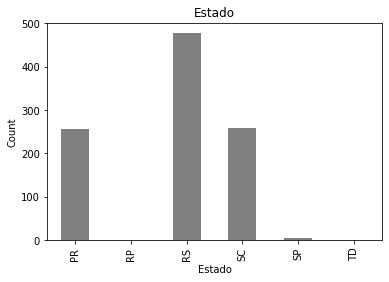

In [ ]:
 #Exibindo o resultado dos valores de Estado agrupados em um grafico de barras.
 agrupado.plot.bar(color = 'gray').set(title='Estado',  xlabel='Estado' , ylabel='Count');

In [ ]:
##Agrupando os valores de genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

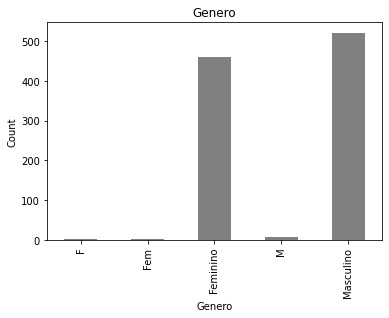

In [ ]:
#Exibindo o resultado dos valores de genero agrupados em um grafico de barras.
agrupado.plot.bar(color = 'gray').set(title='Genero', xlabel='Genero', ylabel='Count');

**Análise Estado:** Considerando que a região de atuação do banco é na região sul, os estados cadastrados como RP, SP e TD são considerados valores impossíveis e serão modificados pelo elemento de maior frequência (moda). </br>
**Análise Genero:** Observamos que as variáveis Masculino e Femenino apresentaram formas variadas no cadastros, para que o modelo de Machine learning compreenda que se trata da mesma informação, transformaremos as variações em Feminino e Masculino.


Iniciaremos a **análise dos valores númericos**, a quantidade, média, desvio padrão, mínimo, primeiro, segundo (mediana) e terceiro quartis, máximo e outliers.

In [ ]:
#Obtendo os valores de quantidade, média, desvio padrão, mínimo, primeiro, segundo (mediana) e terceiro quartis e máximo para o Score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

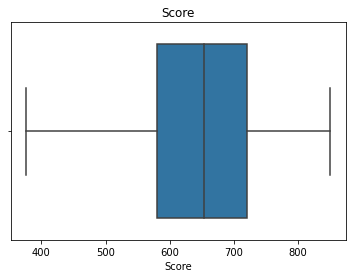

In [ ]:
#Exibindo o Score em um gráfico boxplot.
srn.boxplot(x=dataset['Score']).set(title='Score');

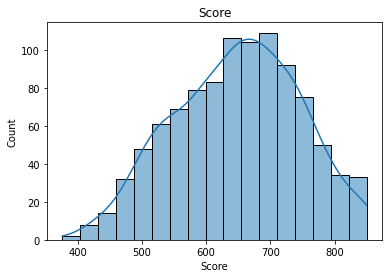

In [ ]:
#Exibindo o Score em um gráfico histograma.
srn.histplot(x=dataset['Score'], kde=True).set(title='Score');

In [ ]:
#Obtendo os valores de quantidade, média, desvio padrão, mínimo, primeiro, segundo (mediana) e terceiro quartis e máximo para a idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

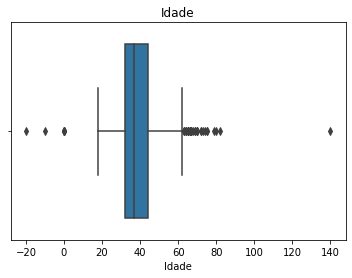

In [ ]:
#Exibindo a idade em um gráfico boxplot.
srn.boxplot(x=dataset['Idade']).set(title='Idade');

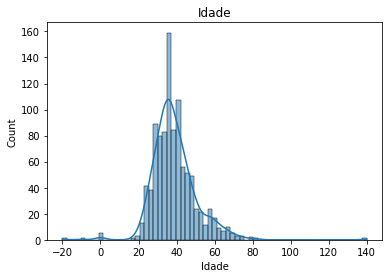

In [ ]:
#Exibindo a idade em um gráfico histograma.
srn.histplot(x=dataset['Idade'], kde=True).set(title='Idade');

In [ ]:
#Obtendo os valores de quantidade, média, desvio padrão, mínimo, primeiro, segundo (mediana) e terceiro quartis e máximo para o saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

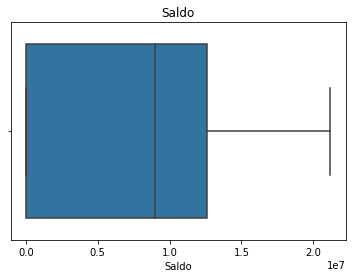

In [ ]:
#Exibindo o Saldo em um gráfico boxplot.
srn.boxplot(x=dataset['Saldo']).set(title='Saldo');

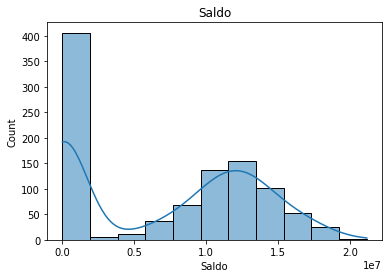

In [ ]:
#Exibindo o Saldo em um gráfico histograma.
srn.histplot(x=dataset['Saldo'], kde=True).set(title='Saldo');

In [ ]:
#Obtendo os valores de quantidade, média, desvio padrão, mínimo, primeiro, segundo (mediana) e terceiro quartis e máximo para o Salario
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

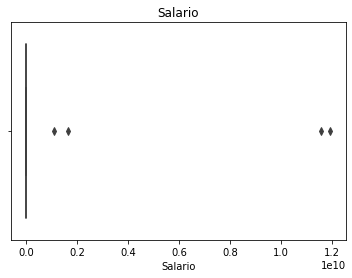

In [ ]:
#Exibindo o Salario em um gráfico boxplot.
srn.boxplot(x=dataset['Salario']).set_title('Salario');

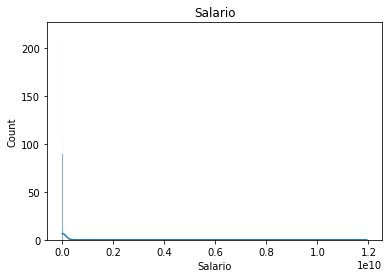

In [ ]:
#Exibindo o Salario em um gráfico histograma.
srn.histplot(x=dataset['Salario'], kde=True).set(title='Salario');

**Análise Score:** O gráfico boxplot não apresentou anomalias (outlier) e o histógrama apresentou uma curva de densidade próxima a uma distribuição normal. Não realizaremos nenhuma modificação nesse dado.</br>
**Análise Idade:** Apresentou valores impossíveis, como idade mínima de -20 anos e outlier negativos e positivos foram identificados. Para essa situação, os valores serão modificados para a mediana dos dados.</br>


Identificando se no DataFrame alguma das colunas possui **valores vazios**. Para variáveis categóricas, os valores vazios serão substituídos pela Moda, já para variáveis numéricas, os valores vazios serão substituídos pela mediana.

In [ ]:
#Identificando a quantidade de valores vazios.
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [ ]:
#salarios
#remover vazios e substiutir pela mediana
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [ ]:
#calculando a mediana para o salário
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [ ]:
#substituir vazios por mediana
dataset['Salario'].fillna(mediana, inplace=True)

In [ ]:
#Verificamos se vazios não existem mais
dataset['Salario'].isnull().sum()

0

In [ ]:
#genero
#remover vazios e substiutir pela mediana
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [ ]:
#total de vazios
dataset['Genero'].isnull().sum()

8

In [ ]:
#preenche vazios com Masculino (moda)
dataset['Genero'].fillna('Masculino', inplace=True)

In [ ]:
#verificamos novamente vazios
dataset['Genero'].isnull().sum()

0

In [ ]:
#padronizando Genero de acordo com o dominio
dataset.loc[dataset['Genero'] ==  'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin( ['Fem','F']), 'Genero'] = "Feminino"
#visualizando o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [ ]:
#idades fora do dominio
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [ ]:
#visualizando idades impossíveis e outliers 
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [ ]:
#calular a mediana para idade
mediana = sts.median(dataset['Idade'])
mediana

37

In [ ]:
#substitui os outliers pela mediana
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120), 'Idade'] = mediana

In [ ]:
#verificamos se ainda existem idades fora do domínio
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
#Verificando se há dados duplicados buscamos pelo ID
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [ ]:
#excluimso o dado duplicado pelo ID
dataset.drop_duplicates(subset="Id", keep='first',inplace=True)
#verificando de o dado duplicado foi excluido.
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
#estado foram do domínio serão substituidos pela Moda (RS)
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [ ]:
#atribuomos RS (moda)
dataset.loc[dataset['Estado'].isin( ['RP','SP','TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()

In [ ]:
#verificamos o resultado
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [ ]:
#outliers em salário
desv = sts.stdev(dataset['Salario'])

In [ ]:
#definir padrão como maior que 2 desvios padrão
#checamos se algum atende critério
dataset.loc[dataset['Salario'] >=  2 * desv ] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [ ]:
#Calculando a mediana para Salario
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [ ]:
#vamos atualiar salarios maiores de duas vezes o desvio padrão para mediana
dataset.loc[dataset['Salario'] >=  2 * desv, 'Salario'] = mediana
#checamos se algum atende critério
dataset.loc[dataset['Salario'] >=  2 * desv ] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
dataset.shape

(998, 12)

Realizamos todas as modificações e revisões necessárias

## Criação do modelo de Machine Learning utilizando Seleção de Atributos

In [ ]:
# A classe é o que desejamos prever, a coluna Sair. previsores são os atributos
previsores = dataset.iloc[:,0:11].values
classe = dataset.iloc[:,11].values

In [ ]:
# Transformação dos atributos categóricos em atributos numéricos (Estado e Genero)
labelencoder = LabelEncoder()
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])

In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 1)

In [ ]:
# Criação do modelo e treinamento
svm = SVC()
svm.fit(X_treinamento, y_treinamento)

SVC()

In [ ]:
#Obtenção das previsões
previsoes = svm.predict(X_teste)
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#Taxa de acerto
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.7866666666666666

In [ ]:
# Utilização do algoritmo ExtraTreesClassifier para extrair as características mais importantes
forest = ExtraTreesClassifier()
forest.fit(X_treinamento, y_treinamento)
importancias = forest.feature_importances_
importancias

array([0.09254461, 0.10427837, 0.05974923, 0.03116311, 0.17631944,
       0.09807075, 0.10245533, 0.13703078, 0.0348205 , 0.06600061,
       0.09756728])

In [ ]:
# Criação de nova base de dados utilizando somente os atributos mais importantes
X_treinamento2 = X_treinamento[:,[1,4,6,7]]
X_teste2 = X_teste[:,[1,4,6,7]]

In [ ]:
# Criar de outro modelo com a base de dados reduzida, treinamento e obtençaão das previsões e taxa de acerto
svm2 = SVC()
svm2.fit(X_treinamento2, y_treinamento)
previsoes2 = svm2.predict(X_teste2)
taxa_acerto = accuracy_score(y_teste, previsoes2)
taxa_acerto

0.7866666666666666

Observamos que o modelo construído possui 78.67% de acurácia. Além disso, apesar de o novo modelo não melhorar esse parâmetro, observamos a redução significativa da quantidade de variáveis no modelo.


## Criação do modelo de Machine Learning utilizando Algoritmo Random Forest

In [ ]:
# Importação das bibliotecas
from sklearn.ensemble import RandomForestClassifier # utilizar o método Random Forest

dataset.head()


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
# A classe é o que desejamos prever, a coluna Sair. previsores são os atributos
previsores = dataset.iloc[:,0:11].values
classe = dataset.iloc[:,11].values

In [ ]:
# Transformação dos atributos categóricos em atributos numéricos (Estado e Genero)
labelencoder = LabelEncoder()
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])

In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [ ]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [ ]:
# Visualização dos atributos principais
floresta.estimators_
#floresta.estimators_[1]

[DecisionTreeClassifier(max_features='sqrt', random_state=650184772),
 DecisionTreeClassifier(max_features='sqrt', random_state=1512824255),
 DecisionTreeClassifier(max_features='sqrt', random_state=1742184932),
 DecisionTreeClassifier(max_features='sqrt', random_state=1544821271),
 DecisionTreeClassifier(max_features='sqrt', random_state=723136509),
 DecisionTreeClassifier(max_features='sqrt', random_state=1754419793),
 DecisionTreeClassifier(max_features='sqrt', random_state=606337303),
 DecisionTreeClassifier(max_features='sqrt', random_state=961377708),
 DecisionTreeClassifier(max_features='sqrt', random_state=202423876),
 DecisionTreeClassifier(max_features='sqrt', random_state=376795200),
 DecisionTreeClassifier(max_features='sqrt', random_state=1473543237),
 DecisionTreeClassifier(max_features='sqrt', random_state=1979498933),
 DecisionTreeClassifier(max_features='sqrt', random_state=897229024),
 DecisionTreeClassifier(max_features='sqrt', random_state=2118213977),
 DecisionTree

In [ ]:
previsoes = floresta.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.8433333333333334

In [ ]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[231,  12],
       [ 35,  22]])

 O modelo Random Forest possui 86% de acurácia.

# Criação do modelo de Machine Learning utilizando Algoritmo Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB # utilizar o método Naïve Bayes que considera os previsores independentes da classe

In [ ]:
# A classe é o que desejamos prever, a coluna Sair. previsores são os atributos
previsores = dataset.iloc[:,0:11].values
classe = dataset.iloc[:,11].values

In [ ]:
# Transformação dos atributos categóricos em atributos numéricos (Estado e Genero)
labelencoder = LabelEncoder()
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])

In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [ ]:
# Criação e treinamento do modelo (geração da tabela de probabilidades)
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [ ]:
# Previsões utilizando os registros de teste
previsoes = naive_bayes.predict(X_teste)
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#geração da matriz de confusão e cálculo da taxa de acerto e erro
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[243,   0],
       [ 57,   0]])

In [ ]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.81

O modelo Naïve Bayes possui 81% de acurácia.

Concluimos que para esse caso especifico o modelo que representou melhor os dados foi o Random Forest com 86% de acurácia.